Author: Shubham Pawaskar

In [107]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
#Read data
df=pd.read_csv('C:\\Users\\Samwise Stark\\Downloads\\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [54]:
plt.rcParams['figure.figsize']=[15,8]

In [55]:
df.shape

(9994, 13)

In [56]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [57]:
df=df.drop('Postal Code',axis=1)

In [58]:
df.duplicated().sum()

50

In [59]:
df=df.drop_duplicates()

In [60]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [61]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


In [62]:
df.describe(include='O')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9944,9944,9944,9944,9944,9944,9944,9944
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5930,5160,9944,906,1980,3177,5986,1518


From the above description, we can see that there are 4 shiping modes, 3 segments, 531 cities, 49 states, 4 regions, 3 Categories, and 17 sub-categories. We can also see that all our data is from a single country, ie the United States. We can hence go ahead and drop that coulumn as it is of no use to us. 

In [63]:
df=df.drop('Country',axis=1)

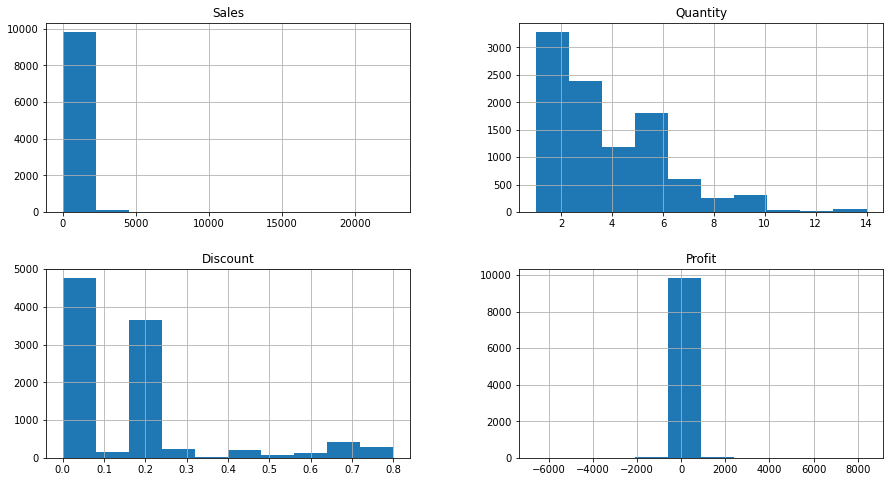

Sales       12.946427
Quantity     1.273812
Discount     1.681206
Profit       7.541727
dtype: float64


In [64]:
df.hist()
plt.show()
print(df.skew())

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200469 -0.028625  0.479078
Quantity  0.200469  1.000000  0.008307  0.066089
Discount -0.028625  0.008307  1.000000 -0.219939
Profit    0.479078  0.066089 -0.219939  1.000000


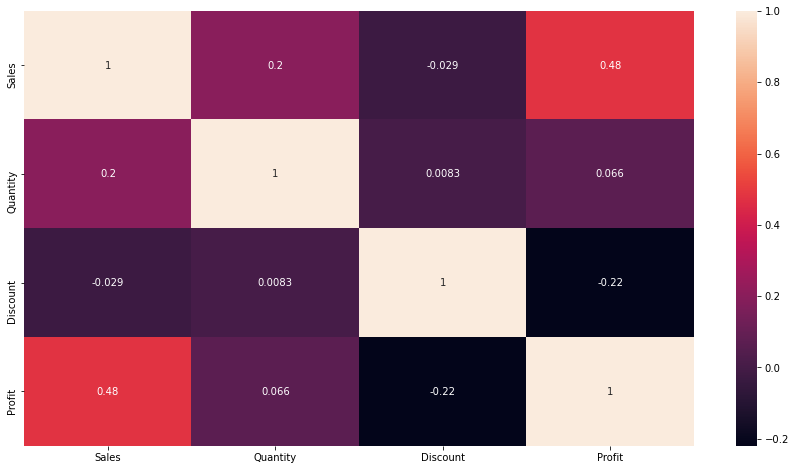

In [65]:
#Correlation Matrix and heatmap
print(df.corr())
sns.heatmap(df.corr(),annot=True)
plt.show()

In [66]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

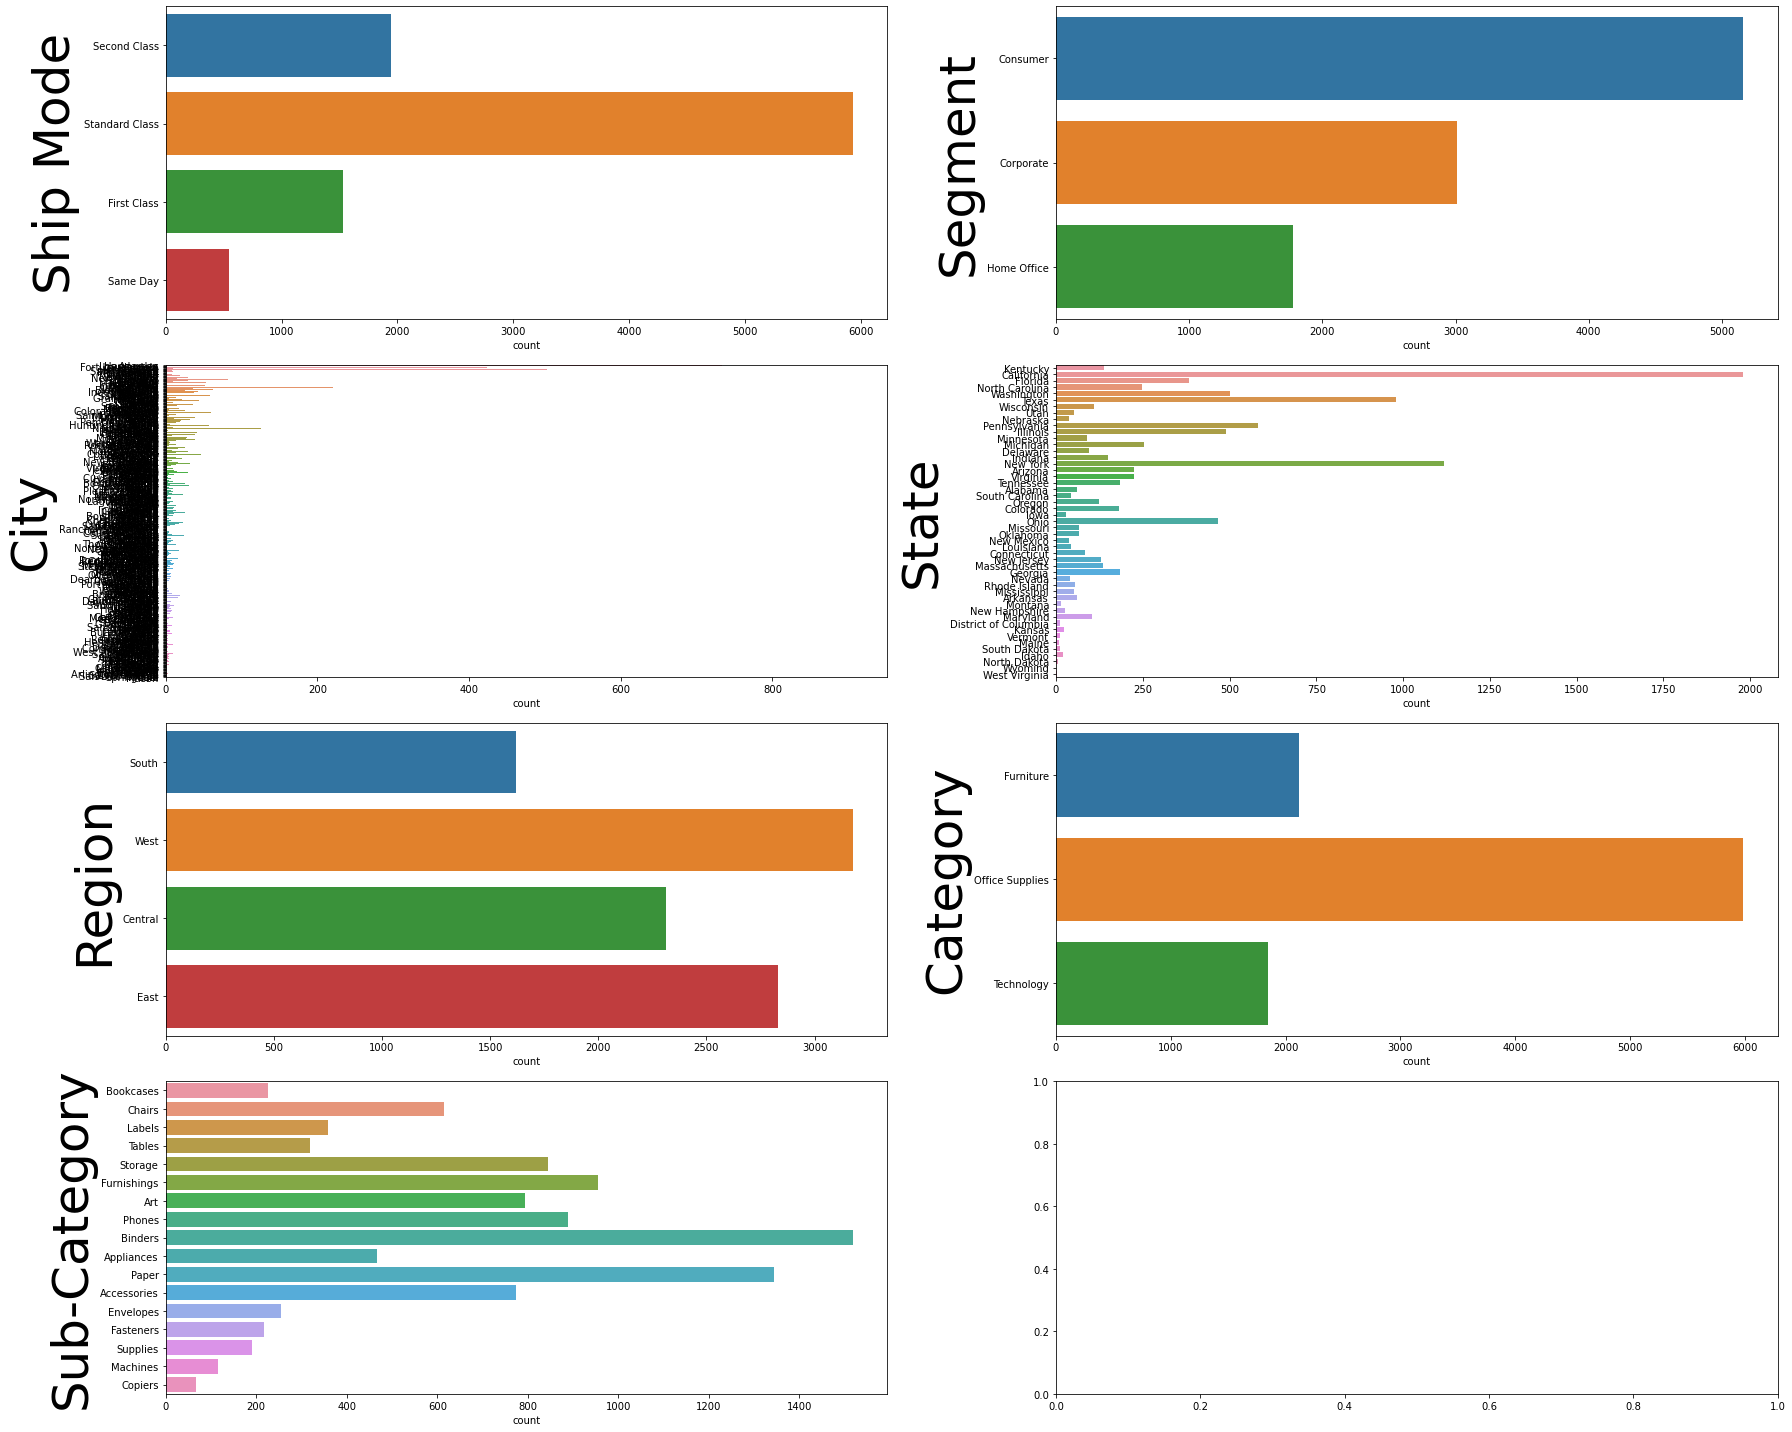

In [71]:
df_cat= df.select_dtypes(include='O')

# plot the count distribution for each categorical variable 
fig, ax = plt.subplots(4, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_cat, ax.flatten()):
    
    # plot the count plot
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(y=df[variable], ax=subplot )
       
    # set the y-axis labels 
    countplot.set_ylabel(variable, fontsize = 50)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

From the above count plots, we can see that most of the items sold are from the "Office Supplies" category. The shipping mode of choice for most customers is "Standard CLass" and the least preferred is "Same-Day" shipping. Considering that most customers would like their products to be shipped to them on the same day as purchase, or at the earliest, the business must ascertain the reason for this low preference of "Same-Day" shipping. The business should also try to focus on "Home Office Supplies" as the least number of orders were from that segment. 

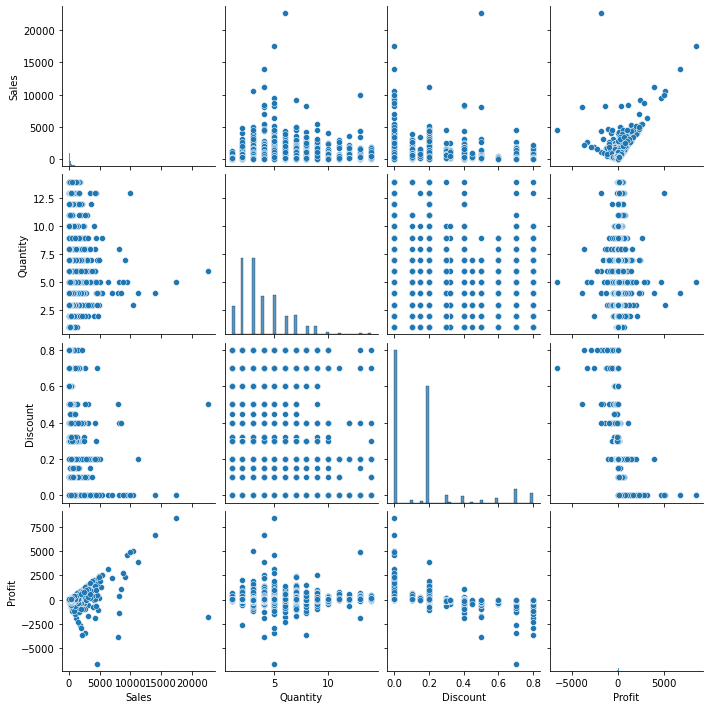

In [68]:
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='Region'>

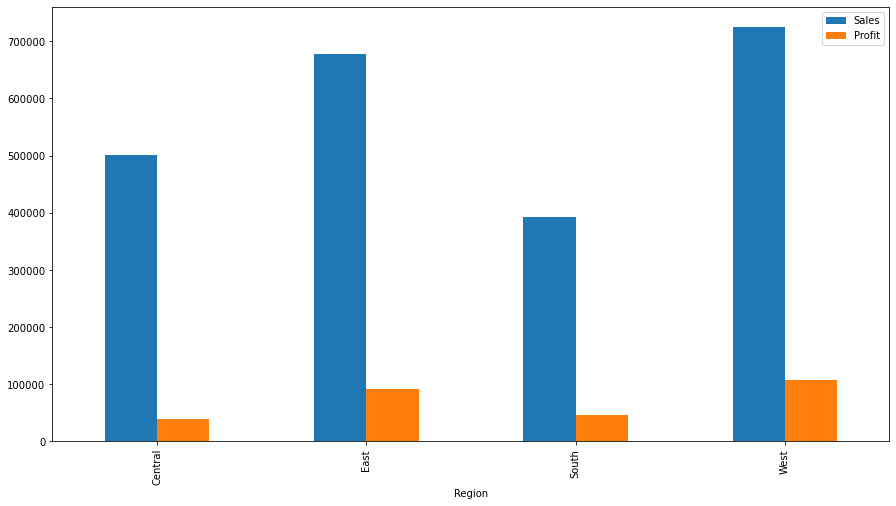

In [69]:
df.groupby(['Region'])[['Sales','Profit']].sum().plot(kind='bar')

From the above bar distribution, we can see that although the sales in the south region are the lowest of all the regions, the profits from the same region are more than the profits of the central region, which sells a lot more products. Thus, the business can look to earn a lot more profits from the central region or find out the root cause for the low profit levels. 

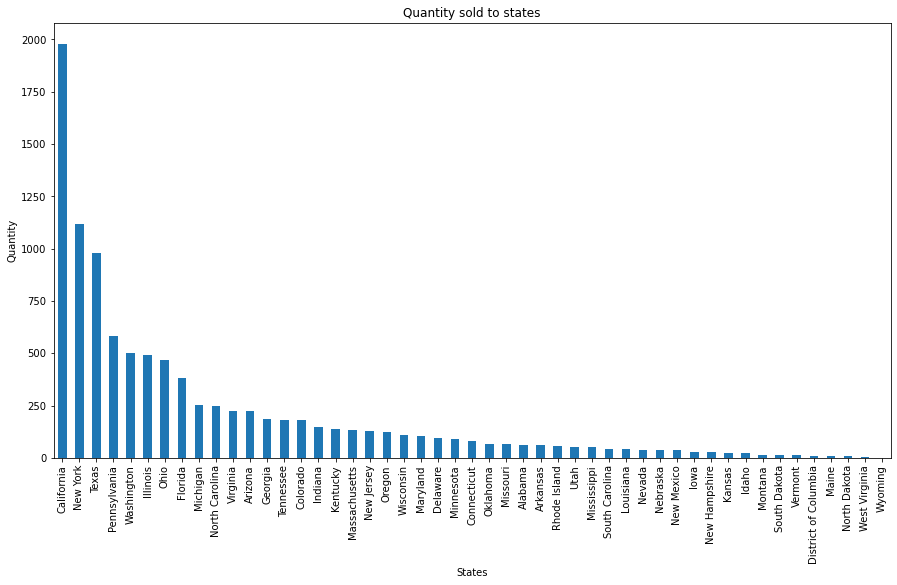

In [70]:
df_state_quantity=df.groupby(['State'])['Quantity'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Quantity sold to states')
plt.xlabel('States')
plt.ylabel('Quantity')
plt.show()

From the above bar distribution, we can see that more products are sold to bigger and richer states like California, New York, and Texas. The exceptions to this include states like Wisconsin, Minnesota which are also big in terms of area. Thus, the business can aim to do much better in these states. 

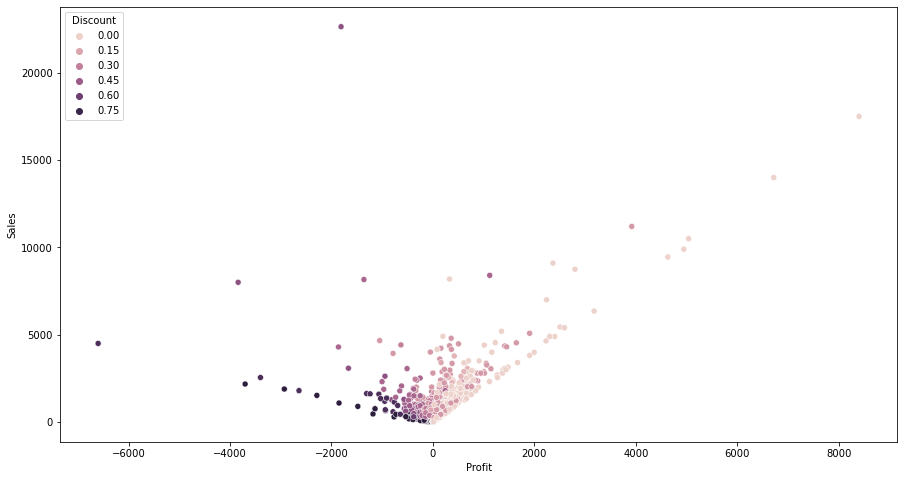

In [72]:
sns.scatterplot(df['Profit'],df['Sales'],hue=df['Discount'])
plt.show()

From the above scatter plot, we can infer that when the discount was 0.3 and below, the profits achieved was higher than when the discount was more than 0.45. A higher discount has also led to losses for the business. 

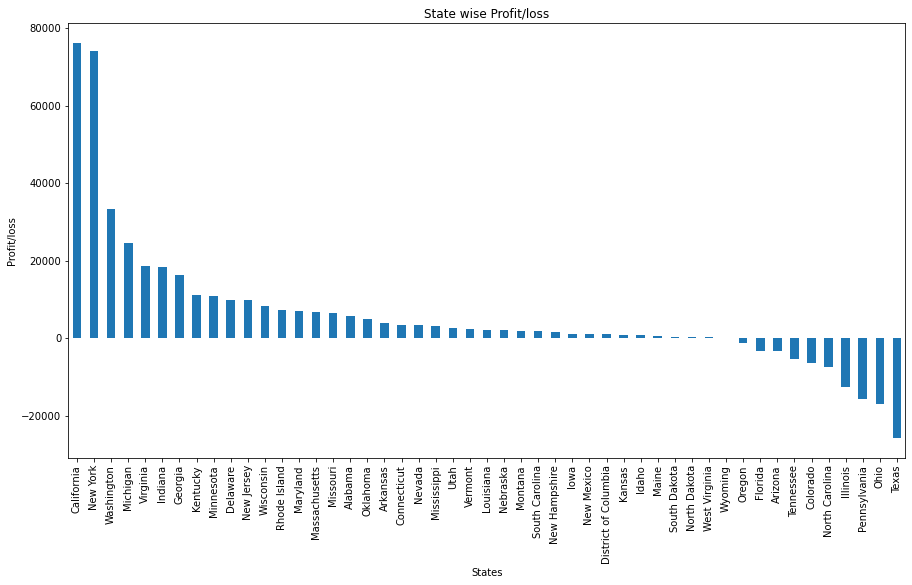

In [75]:
df_state_proft=df.groupby(["State"])["Profit"].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('State wise Profit/loss')
plt.xlabel('States')
plt.ylabel('Profit/loss')
plt.show()

As we can see from the above graph, the orders from the states of Texas, Ohio, Pennsylvania, and North Carolina have lost the company the most money. The business should ascertain the reason behind this and focus on the orders from those states. 

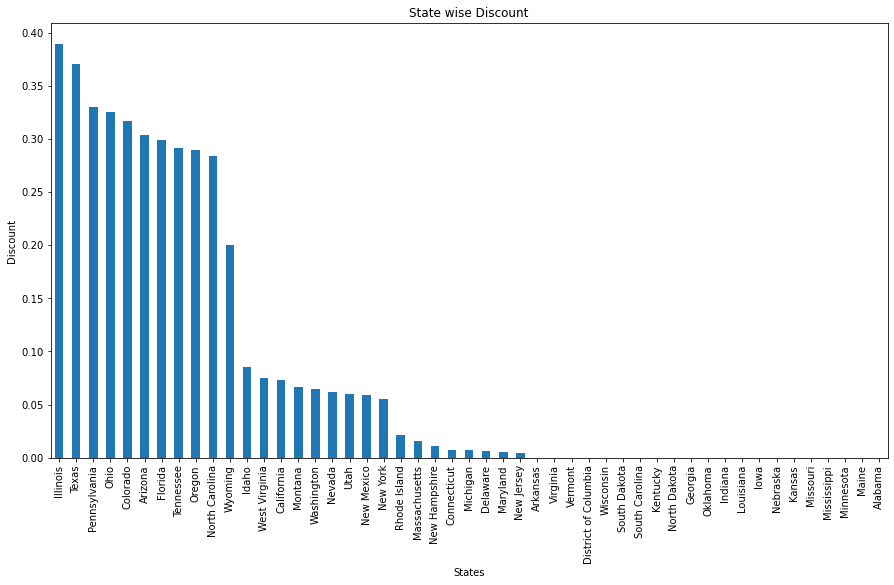

In [106]:
df_state_discount=df.groupby(["State"])["Discount"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('State wise Discount')
plt.xlabel('States')
plt.ylabel('Discount')
plt.show()

From the above 2 graphs, we can infer that the states of Illinois, Texas, Pennsylvania, and Ohio, might be losing the business money because of the high average percentage of discounts offered in those states. While there may be other factors at hand, this seems to be one of the reasons affecting profits in those states. States like California and New York on the other hand generate a profit for the company while maintaining a moderate percentage of discount. This seems to support the claim that profits are more or less inversly related to discounts. I advise that the business reduce its discounts in the states which are turning losses. 

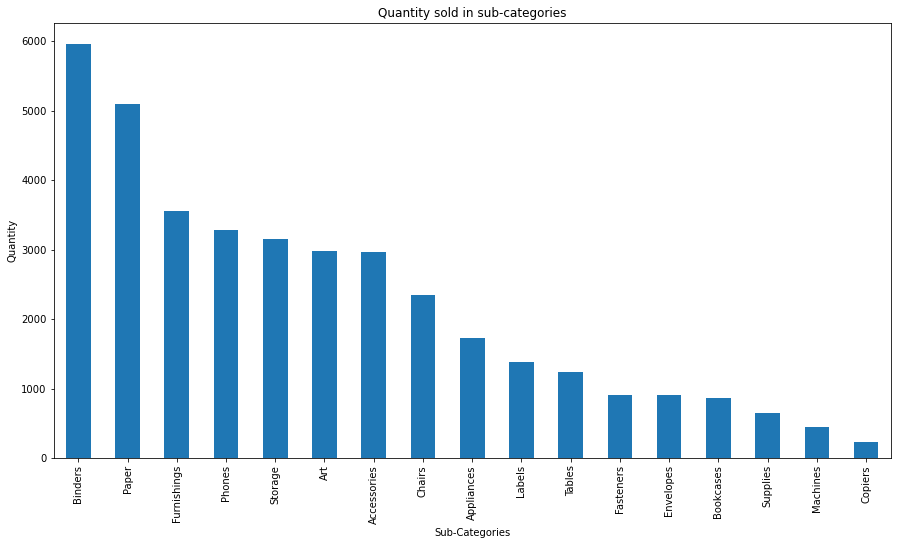

In [88]:
df_subcategory_deals=df.groupby(['Sub-Category'])['Quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Quantity sold in sub-categories')
plt.xlabel('Sub-Categories')
plt.ylabel('Quantity')
plt.show()

From the above bar graph, we can see that Binders are the most sold sub-category while copiers are the least sold. 

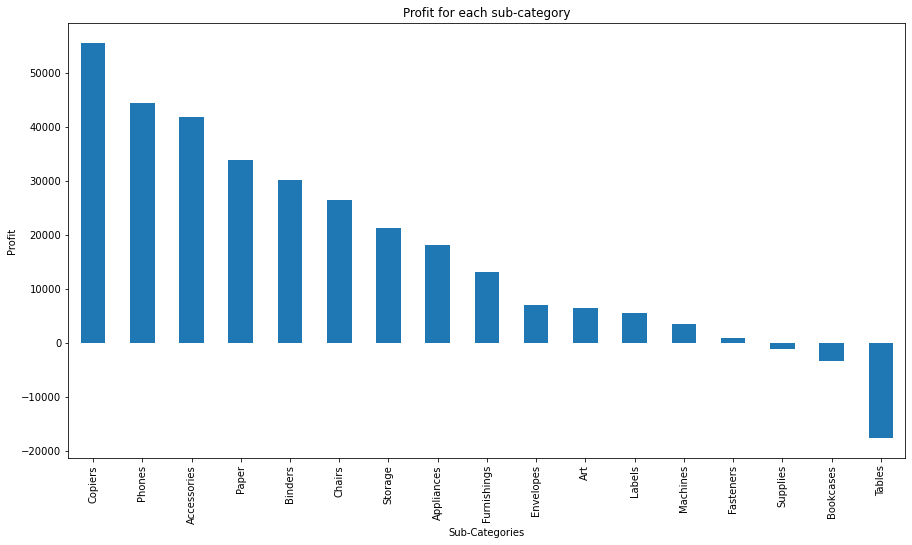

In [91]:
df_subcategory_deals=df.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Profit for each sub-category')
plt.xlabel('Sub-Categories')
plt.ylabel('Profit')
plt.show()

Although copiers are sold the least compared to other products, they make the business the most profit. The company should try and rectify the lossess incurred from tables.

<AxesSubplot:xlabel='Region'>

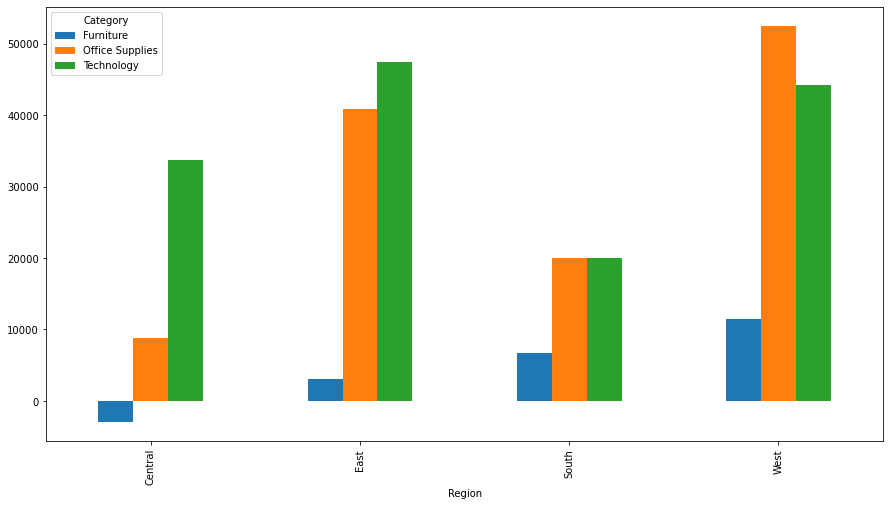

In [97]:
table=pd.crosstab(index=df['Region'],columns=df['Category'],values=df['Profit'],aggfunc='sum').plot(kind='bar')
table

From the above bar graph, we can infer that the sales from the Furniture category from the Central Region is resulting in losses. 

<AxesSubplot:xlabel='Region'>

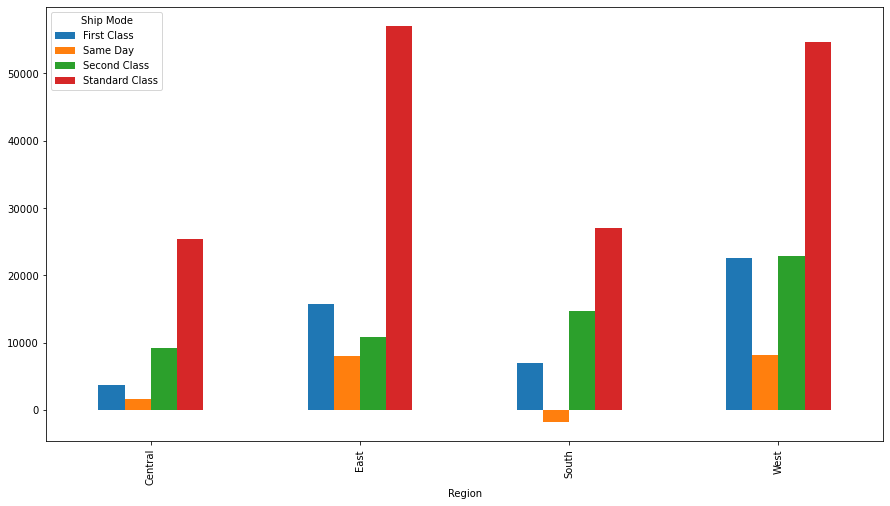

In [101]:
table2=pd.crosstab(index=df['Region'],columns=df['Ship Mode'],values=df['Profit'],aggfunc='sum').plot(kind='bar')
table2

From the above graph, we can see that the most profit is made from orders that are being shipped by 'Standard Class'. The orders that are being delivered on the same day are generating the least amount of profit. Those in the South Zone are actually incurring some losses for the business. 

<AxesSubplot:xlabel='Region'>

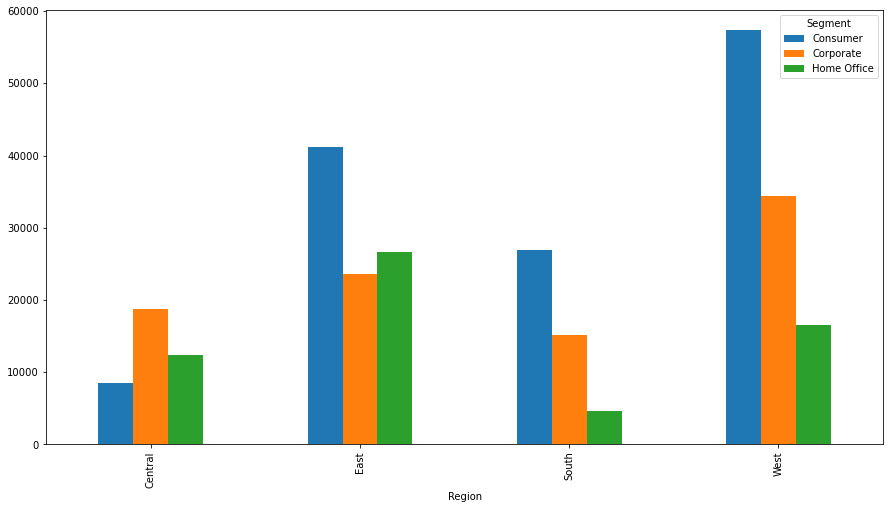

In [102]:
table3=pd.crosstab(index=df['Region'],columns=df['Segment'],values=df['Profit'],aggfunc='sum').plot(kind='bar')
table3

From the above graph, we can observe that the consumer segment is generating the most profits for the business in all regions except the central region. The business can try and focus on the consumer segment in the south zone to ascertain why the profits are less for such a profitable segment in other regions. 

<AxesSubplot:xlabel='Region'>

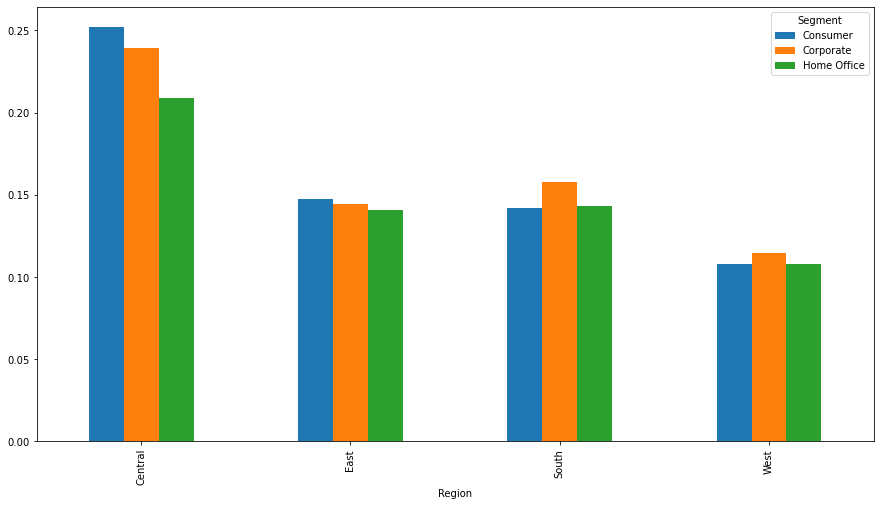

In [104]:
table2=pd.crosstab(index=df['Region'],columns=df['Segment'],values=df['Discount'],aggfunc='mean').plot(kind='bar')
table2

The above 2 graphs lend credibility to the earlier claim that the states earning the least amount of profit are doing so because of high average discounts. We now know that those states are in the central zone as both profits are low and discounts are high in this region.